GRU:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Embedding, LSTM, Dropout, Activation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
np.set_printoptions(suppress=True)  # 关闭科学计数法

data_csv = pd.read_csv("./filtered.csv")#读取filtered file
trajectory = np.array(data_csv, dtype=np.float64)  # trajectory1[:, 2:9] 原为2个数据 现为8个
dataX, dataY = [], []
    # 定义滑动窗口的大小和步长
window_size = 10
step_size = 1

 # 创建输入数据和目标数据

    # 创建输入数据和目标数据

for i in range(0, len(trajectory) - window_size, step_size):
    dataX.append(trajectory[i:i+window_size])
    dataY.append(trajectory[i+window_size,1:3])

 # 将输入数据和目标数据转换为numpy数组
dataX = np.array(dataX, dtype='float64')
dataY = np.array(dataY, dtype='float64')
# dataY = dataY.reshape(2408,1,2)
# print('dataX shape:', dataX.shape) # (91, 10, 3)
# print('dataY shape:', dataY.shape) # (91, 2)
# 使用transpose()方法交换第二维度和第三维度
dataX = dataX.transpose((0, 2, 1))
# print('dataX shape:', dataX.shape)
train_x = dataX
train_y= dataY
x_data = train_x
x_data = np.array(x_data)
# x_data = x_data.reshape(19828,5,1)
y_data = train_y
y_data.shape
# Preporcessing Normalizing Valuse

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
# new_df= x_data.reshape(x_data.shape[0],5)
x_data=x_data.reshape(2408,50)
new_x_data = sc.fit_transform(x_data)
new_x_data = new_x_data.reshape(2408,5,10)
print('X_data shape :', x_data.shape)
print('new X_data shape :', new_x_data.shape)
# y_data=y_data.reshape(2408,2)
new_y_data = sc.fit_transform(y_data)
# new_y_data = new_y_data.reshape(2408,2)
print('y_data shape :', y_data.shape)
print('new y_data shape :', new_y_data.shape)
# print(new_x_data)
print(new_y_data)
x_train, x_test, y_train, y_test = train_test_split(new_x_data, new_y_data, test_size=0.3, random_state=42)

# 创建GRU模型
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=32, input_shape=(5,10)),
    tf.keras.layers.Dense(units=2),
])

# 编译模型
model.compile(loss='mse', optimizer='adam')
model.summary()

# 训练模型

history =model.fit(x=x_train, y=y_train, epochs=200,batch_size=32,validation_data=(x_test,y_test))
model.save("gru.h5")
model = load_model("gru.h5")
gru_pred_train = model.predict(x_train)
gru_pred_test = model.predict(x_test)

X_data shape : (2408, 50)
new X_data shape : (2408, 5, 10)
y_data shape : (2408, 2)
new y_data shape : (2408, 2)
[[-1.         -1.        ]
 [-0.99969315 -0.99884536]
 [-0.99938229 -0.99769038]
 ...
 [ 0.66212312  0.99439013]
 [ 0.65831461  0.99719455]
 [ 0.65450609  1.        ]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                4224      
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
53/53 [==============================] - 2s 11ms/step - loss: 0.1834 - val_loss: 0.0390
Epoch 2/200
53/53 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0163
Epoch 3/200
53/53 [=================

LSTM:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.recurrent import LSTM,RNN
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from keras import regularizers

# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)  # 关闭科学计数法

data_csv = pd.read_csv("./filtered.csv")#读取filtered file
trajectory = np.array(data_csv, dtype=np.float64)  # trajectory1[:, 2:9] 原为2个数据 现为8个
dataX, dataY = [], []
    # 定义滑动窗口的大小和步长
window_size = 10
step_size = 1
# 创建输入数据和目标数据
# 创建输入数据和目标数据
for i in range(0, len(trajectory) - window_size, step_size):
    dataX.append(trajectory[i:i+window_size])
    dataY.append(trajectory[i+window_size,1:3])

# 将输入数据和目标数据转换为numpy数组
dataX = np.array(dataX, dtype='float64')
dataY = np.array(dataY, dtype='float64')
# dataY = dataY.reshape(2408,1,2)
print('dataX shape:', dataX.shape) # (91, 10, 3)
print('dataY shape:', dataY.shape) # (91, 2)
# 使用transpose()方法交换第二维度和第三维度
dataX = dataX.transpose((0, 2, 1))
print('dataX shape:', dataX.shape)
train_x = dataX
train_y= dataY
print(train_x)
print(train_y)
x_data = train_x
x_data = np.array(x_data)
# x_data = x_data.reshape(19828,5,1)
x_data.shape
y_data = train_y

y_data.shape
# Preporcessing Normalizing Valuse

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
# new_df= x_data.reshape(x_data.shape[0],5)
x_data=x_data.reshape(2408,50)
new_x_data = sc.fit_transform(x_data)
new_x_data = new_x_data.reshape(2408,5,10)

print('X_data shape :', x_data.shape)
print('new X_data shape :', new_x_data.shape)


# y_data=y_data.reshape(2408,2)
new_y_data = sc.fit_transform(y_data)
# new_y_data = new_y_data.reshape(2408,2)
print('y_data shape :', y_data.shape)
print('new y_data shape :', new_y_data.shape)
# print(new_x_data)
print(new_y_data)
x_train, x_test, y_train, y_test = train_test_split(new_x_data, new_y_data, test_size=0.3, random_state=42)
model = Sequential()

# first layer
# model.add(LSTM(units=50, batch_input_shape=(None,5,10),return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(units=50, batch_input_shape=(None,5,10),return_sequences=True))
model.add(Dropout(0.2))

# second layer
# model.add(Dense(128, 1))
# model.add(LSTM(units=100,return_sequences=True,kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

# third layer
# model.add(LSTM(units=50,return_sequences=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(units=50,return_sequences=False))

model.add(Dropout(0.2))

# fourth dense layer
model.add(Dense(units=2))
#不声明默认为0.001
# adam = Adam(learning_rate=0.0015)#减小学习率：可以通过将优化器的learning_rate参数设置为一个较小的值来减小学习率。例如，可以将模型编译代码修改为：

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])#增加L2正则化项：将kernel_regularizer参数设置为regularizers.l2()，并指定相应的正则化系数。
model.summary()

# # 定义LSTM模型
# model = Sequential()
# model.add(LSTM(64, input_shape=(10, 5)))
# model.add(Dense(2))

# # 编译模型
# model.compile(loss='mse', optimizer='adam')
# model.summary()
'''
# LSTM层的units数：增加units数可以增加模型的表达能力，但也会增加模型的复杂度和训练时间。因此，可以尝试不同的units数并找到一个合适的值。

# Dropout层的比率：增加Dropout比率可以减少过拟合的风险，但过高的Dropout比率会影响模型的性能。因此，可以尝试不同的Dropout比率并找到一个合适的值。

# 学习率(learning rate)：Adam优化器默认的学习率通常可以正常工作，但有时候需要手动调整学习率以加速或稳定训练过程。

# 批量大小(batch size)：批量大小会影响模型的训练速度和内存占用情况。通常情况下，使用大批量大小可以加快训练速度，但也会占用更多的内存。

# 训练轮数(epochs)：增加训练轮数可以提高模型的精度，但也会增加训练时间。可以使用早停法(early stopping)等技术来提高模型的训练效率。
 '''
history = model.fit(x_train,y_train,epochs=200, batch_size=32,validation_data=(x_test,y_test))
model.save("LSTM.h5")
model1 = load_model("LSTM.h5")
lstm_pred_train = model.predict(x_train)
lstm_pred_test = model.predict(x_test)

dataX shape: (2408, 10, 5)
dataY shape: (2408, 2)
dataX shape: (2408, 5, 10)
[[[     0.          1.          2.     ...      7.          8.
        9.    ]
  [679864.4007 679864.4159 679864.4315 ... 679864.5083 679864.5238
   679864.5391]
  [419283.8057 419284.144  419284.4826 ... 419286.1755 419286.5141
   419286.8528]
  [    11.12       11.12       11.12   ...     11.12       11.12
       11.12  ]
  [     0.          0.          0.     ...      0.          0.
        0.    ]]

 [[     1.          2.          3.     ...      8.          9.
       10.    ]
  [679864.4159 679864.4315 679864.4467 ... 679864.5238 679864.5391
   679864.5546]
  [419284.144  419284.4826 419284.8213 ... 419286.5141 419286.8528
   419287.1914]
  [    11.12       11.12       11.12   ...     11.12       11.12
       11.12  ]
  [     0.          0.          0.     ...      0.          0.
        0.    ]]

 [[     2.          3.          4.     ...      9.         10.
       11.    ]
  [679864.4315 679864.4467 679

In [3]:
# 导入需要的库
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# 原数据
# x_train, x_test, y_train, y_test
# 加载数据集和GRU、LSTM模型的预测结果


# gru_pred_train = load_gru_pred_train()  # GRU模型的训练集预测结果 输出
# gru_pred_test = load_gru_pred_test()    # GRU模型的测试集预测结果 输出

# lstm_pred_train = load_lstm_pred_train()  # LSTM模型的训练集预测结果 输出
# lstm_pred_test = load_lstm_pred_test()    # LSTM模型的测试集预测结果 输出
x_train=x_train.reshape(-1,50)
x_test=x_test.reshape(-1,50)

# 将GRU和LSTM的预测结果作为特征融合在一起
X_train = np.column_stack((x_train, gru_pred_train, lstm_pred_train))
X_test = np.column_stack((x_test, gru_pred_test, lstm_pred_test))

# 使用随机森林模型拟合数据
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)
print(y_pred)
# 评估模型
# evaluation(y_test, y_pred)

[[ 0.83084186  0.85853785]
 [ 0.83084186  0.85853785]
 [-0.71310374 -0.41425886]
 ...
 [ 0.83086227  0.85848147]
 [ 0.83085012  0.85851547]
 [ 0.83084186  0.85853785]]


In [4]:
result= y_pred
# # 设置打印选项，精度为3位小数
# np.set_printoptions(precision=5, suppress=True)

res_df = sc.inverse_transform(result)
# res_df.reshape(new_df.shape[0],5,1)
res_df
print(res_df.shape)
print(res_df)


(723, 2)
[[679955.84394513 419832.20976238]
 [679955.84394513 419832.20976238]
 [679878.85980691 419458.96066182]
 ...
 [679955.84496274 419832.19322956]
 [679955.84435727 419832.20319948]
 [679955.84394513 419832.20976238]]


In [5]:
y_test=y_test.reshape (723, 2)  #需要改的地方
# y_test_actual=sc.inverse_transform(y_test[2:3])
y_test_actual=sc.inverse_transform(y_test)
print(y_test_actual)
print(y_test_actual.shape)
# for i in range(len(result)):
#     plt.scatter(result[0][i],result[1][i],c='r')
#     plt.scatter(y_test[0][i],y_test[1][i],c='g')

# plt.show()

[[679955.8413 419832.253 ]
 [679955.8419 419832.2448]
 [679878.8793 419458.8907]
 ...
 [679955.8474 419832.1637]
 [679955.844  419832.2116]
 [679955.8437 419832.2183]]
(723, 2)


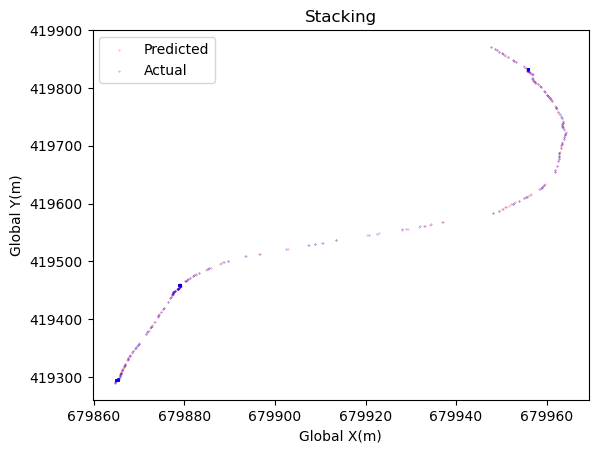

In [7]:
# 绘制预测值和实际值

predicted_df = pd.DataFrame(data=res_df[0:,0:],index=[i for i in range(res_df.shape[0])],columns=['f'+str(i) for i in range(res_df.shape[1])])

actual_df = pd.DataFrame(data=y_test_actual[0:,0:],index=[i for i in range(y_test_actual.shape[0])],columns=['f'+str(i) for i in range(y_test_actual.shape[1])])

# for i in range(len(res_df)):
# #   print(i)
plt.scatter(x=predicted_df['f0'],y=predicted_df['f1'],c='r',s=0.1,alpha=0.5,label='Predicted')
plt.scatter(x=actual_df['f0'],y=actual_df['f1'],c='b',s=0.1,alpha=0.5,label='Actual')
plt.title('Stacking')
plt.xlabel('Global X(m)')
plt.ylabel('Global Y(m)')
plt.legend()
plt.show()




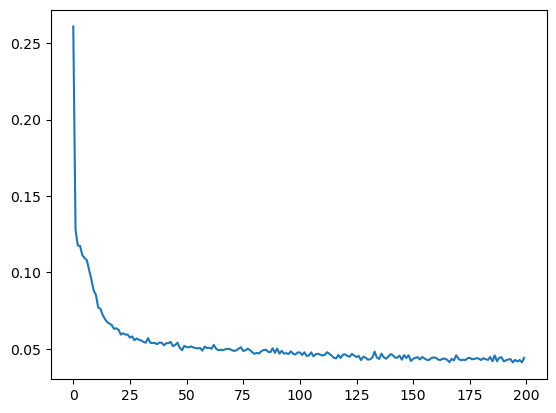

In [8]:
plt.plot(history.history['loss'])
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # 定义真实定位数据和预测数据
# true_pos = np.array([[1, 2], [3, 4], [5, 6]])
# pred_pos = np.array([[0.5, 1.5], [3.2, 3.9], [4.9, 6.2]])

# 计算均方误差
mse = mean_squared_error(actual_df, predicted_df)
print("MSE:", mse)

# 计算平均绝对误差
mae = mean_absolute_error(actual_df, predicted_df)
print("MAE:", mae)

# 计算相关系数矩阵
corr_matrix = np.corrcoef(actual_df.T, predicted_df.T)
corr_coefficient = corr_matrix[0, 1] # 取出相关系数值
print("相关系数为：", corr_coefficient) # 打印相关系数
# 计算决定系数
r2 = r2_score(actual_df, predicted_df)
print("R^2:", r2)

import numpy as np

# 将实际值和预测值分别存储在矩阵中
actual_matrix = np.array(actual_df)
predicted_matrix = np.array(predicted_df)
correlation_matrix = np.corrcoef(actual_matrix, predicted_matrix, rowvar=False) # 计算相关系数（Pearson相关系数）
correlation_coefficient = correlation_matrix[0, 1] # 提取相关系数矩阵中的相关系数
print("Correlation coefficient:", correlation_coefficient) # 打印相关系数



MSE: 0.05824850443744229
MAE: 0.08155734364760017
相关系数为： 0.9597269629903602
R^2: 0.9999973385174523
Correlation coefficient: 0.9597269629903602


In [10]:
 #合并两个矩阵
merged_matrix = np.concatenate((y_test_actual, res_df), axis=1)#真实,预测

print(merged_matrix) # 输出合并后矩阵的形状

[[679955.8413     419832.253      679955.84394513 419832.20976238]
 [679955.8419     419832.2448     679955.84394513 419832.20976238]
 [679878.8793     419458.8907     679878.85980691 419458.96066182]
 ...
 [679955.8474     419832.1637     679955.84496274 419832.19322956]
 [679955.844      419832.2116     679955.84435727 419832.20319948]
 [679955.8437     419832.2183     679955.84394513 419832.20976238]]


In [11]:
import numpy as np



# 计算每行数据中两个点之间的欧式距离
distances = np.linalg.norm(merged_matrix[:, :2] - merged_matrix[:, 2:], axis=1)
print(distances)
np.savetxt('distances.txt', distances)


[0.04331846 0.03509726 0.07262669 0.00013264 0.00283367 0.35047308
 0.68365925 0.00283367 0.00283367 0.00821109 0.04487168 0.07832864
 0.00283367 0.03082606 0.13332039 0.02651873 0.28491801 0.00445074
 0.04798802 0.01308535 0.00283367 0.18812035 0.12558131 0.84489688
 0.01925121 0.07386033 0.04797452 0.49733769 0.00283367 0.00283367
 0.00448636 0.01732215 0.12392264 0.00283367 0.00809754 0.01053542
 0.00283367 1.11110441 0.40764407 0.00283367 0.0089235  0.17484597
 0.02646946 0.91179295 0.12703731 0.16803351 0.17882052 1.72687736
 0.00283367 0.00375724 0.10851737 0.00283367 0.18023142 0.52722629
 0.77662807 0.04216184 1.05394532 0.70755511 0.00041632 0.0540412
 1.5340531  0.00900531 1.90562105 0.02715415 0.04146408 0.01736861
 0.0289902  0.3139693  0.00092563 0.02448537 0.00283367 0.02945679
 0.00283367 0.07546932 0.00283367 0.0349565  0.00812438 0.00313821
 0.00283367 0.02640469 0.60489082 0.01765786 0.01470838 0.00241515
 0.00283367 0.08916224 0.18728253 0.341252   1.87636293 0.85763

In [12]:
import numpy as np

distances = np.loadtxt('distances.txt')
mean_distance = np.mean(distances)

print('Mean distance:', mean_distance)

Mean distance: 0.1434698932714909
